# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Solve a simple Linear Regression problem with PyTorch.


# Note

Apart from the Questions, there are instruction comments throughout the notebook as well as comments inside the code cells beginning with two hashtags (##). In addition, there are #**START CODE  /  #**END CODE comments indicating the startand ending of your code sections. Pay attention not to delete these comments.

#**Q1 Solve a simple Linear Regression problem**

Find the linear relationship between a dependent variable 'y' and an independent variable 'x'.

Equation: y = 4x + 3

In [1]:
## create dummy data for training
import numpy as np
rng = np.random.default_rng(seed=1)
x_train = rng.uniform(low=0.0, high=10.0, size=(15,))
print(x_train)
x_train = np.array(x_train, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

[5.11821625 9.50463696 1.44159613 9.48649447 3.11831452 4.23326449
 8.27702594 4.09199136 5.49593688 0.27559113 7.53513109 5.38143313
 3.29731716 7.88428703 3.03194829]


In [3]:
##create the y values according to equation y = 3x + 4
# *****START CODE

y_train = 3 * x_train + 4

# *****END CODE
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train

array([[19.354649 ],
       [32.51391  ],
       [ 8.324789 ],
       [32.45948  ],
       [13.354943 ],
       [16.699793 ],
       [28.831078 ],
       [16.275974 ],
       [20.48781  ],
       [ 4.8267736],
       [26.605392 ],
       [20.144299 ],
       [13.891952 ],
       [27.65286  ],
       [13.095845 ]], dtype=float32)

In [ ]:
import torch
##convert x_train and y_train numpy arrays to pytorch tensors
# *****START CODE
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
# *****END CODE 
# tensor 是 pytorch张量，是执行数学运算、构建和训练神经网络以及进行科学计算的基本单位，与numpy数组类似

In [5]:
class LinearRegression(torch.nn.Module):
    def __init__(self, in_size, out_size):
        super(LinearRegression, self).__init__()
        ##Define a linear layer
        # *****START CODE
        self.linear = torch.nn.Linear(in_size, out_size)

        # *****END CODE
        #class LinearRegression(torch.nn.Module): 这里定义了一个名为LinearRegression的类，
        # 它继承自torch.nn.Module。在PyTorch中，自定义的模型需要继承自nn.Module类，这是所有神经网络模块的基类。

    def forward(self, x):
        ##forward the input through the model
        # *****START CODE

        out = self.linear(x)

        # *****END CODE
        return out
#总结来说，这段代码定义了一个线性回归模型，
# 它包含一个线性层，可以根据输入特征进行线性变换以预测输出值。这种模型通常用于回归任务，其中目标是预测一个或多个连续值的输出。








In [6]:
##define input and output dimensions of the model
# *****START CODE
in_dim =    1   
out_dim =   1   
# *****END CODE

LR = 0.01 
epochs = 100

model = LinearRegression(in_dim, out_dim)

In [7]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [9]:
#model.train()
for epoch in range(epochs):
    # Set all gradients to zero
    optimizer.zero_grad()

    # feed the inputs to the model, and get the outputs
    # *****START CODE
    outputs = model(x_train )
    # *****END CODE

    # calculate loss for the predicted output
    # *****START CODE
    loss = criterion(outputs, y_train)
    # *****END CODE

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 293.84429931640625
epoch 1, loss 27.21700668334961
epoch 2, loss 4.584229469299316
epoch 3, loss 2.6454808712005615
epoch 4, loss 2.4620118141174316
epoch 5, loss 2.4275736808776855
epoch 6, loss 2.4059364795684814
epoch 7, loss 2.3855409622192383
epoch 8, loss 2.365408182144165
epoch 9, loss 2.3454549312591553
epoch 10, loss 2.3256683349609375
epoch 11, loss 2.3060483932495117
epoch 12, loss 2.2865946292877197
epoch 13, loss 2.2673046588897705
epoch 14, loss 2.248178720474243
epoch 15, loss 2.229212760925293
epoch 16, loss 2.210407257080078
epoch 17, loss 2.1917600631713867
epoch 18, loss 2.1732709407806396
epoch 19, loss 2.154938220977783
epoch 20, loss 2.1367580890655518
epoch 21, loss 2.1187336444854736
epoch 22, loss 2.100858688354492
epoch 23, loss 2.083136796951294
epoch 24, loss 2.0655624866485596
epoch 25, loss 2.048137903213501
epoch 26, loss 2.03085994720459
epoch 27, loss 2.013728141784668
epoch 28, loss 1.9967402219772339
epoch 29, loss 1.9798941612243652
epo

Create random test data and evaluate the trained model.

In [ ]:
## create 'x' values for testing
# *****START CODE



# *****END CODE

In [ ]:
##create the corresponding testing 'y' values
# *****START CODE



# *****END CODE

Evaluate the model.

In [ ]:
from matplotlib import pyplot as plt

model.eval()
with torch.no_grad(): # we don't need gradients in the testing phase
        predicted = model(torch.from_numpy(x_test)).data.numpy()

In [ ]:
##Print the predicted values and the true values
print('Predicted: ')
# *****START CODE
print( )
# *****END CODE

print('True y values: ')
# *****START CODE
print( )
# *****END CODE

In [ ]:
from matplotlib import pyplot as plt
##plot the predicted values along with the true values
# *****START CODE
plt.plot(  ,  , 'go', label='True data', alpha=0.5)
plt.plot(  ,  , '--', label='Predictions', alpha=0.5)
# *****END CODE
plt.legend(loc='best')
plt.show()

#**Q2 Classification with an MLP**

We are going to work with a dataset of 8x8 images of digits, and our goal will be to classify them.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [11]:
digits_dataset = load_digits()
digits_x = digits_dataset.images / 16
digits_y = digits_dataset.target
print(f'There are {len(digits_x)} images in this dataset of size {digits_x.shape[1:]}.')

There are 1797 images in this dataset of size (8, 8).


In [12]:
train_x, val_x, train_y, val_y = train_test_split(digits_x, digits_y, test_size=0.2, shuffle=True)

In [13]:
def plot_digit(x, y, idx):
    x = x[idx]
    plt.imshow(x)
    plt.title(y[idx])
    plt.show()

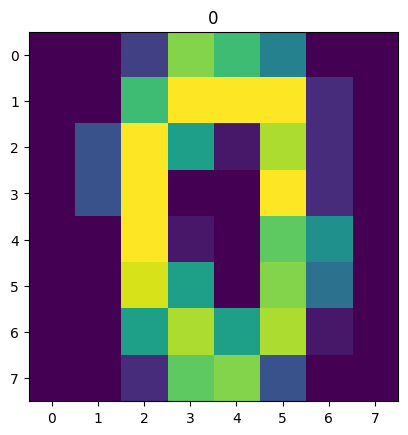

In [14]:
plot_digit(digits_x, digits_y, 20)

## Part 2

You will now implement a simple 2 layer MLP model that you will train using gradient descent algorithm.

Here are a few reminders:

Let $\mathcal{M}$ be a 2 a layer MLP model trained on $X$ to predict $y$ with categorical cross-entropy loss. We have:

\begin{align}
    \mathcal{L} = - \sum_{i=1}^{n} y_ilog(\hat{y}_i)
\end{align}

$\mathcal{M}$ can be decomposed as:

\begin{align}
    \hat{y} &= \sigma_2(Z_2) \\
    Z_2 &= W_2Y_1 + b_2
\end{align}

with $\sigma_2$ the softmax activation function.

and:

\begin{align}
    Y_1 &= \sigma_1(Z_1) \\
    Z_1 &= W_1X + b_1
\end{align}

with $\sigma_1$ the sigmoid activation function.

### Question

Compute the gradient of the softmax activation function used in the output layer for categorical cross-entropy loss.

### Question

Compute the gradient of the categorical cross-entropy loss function $\mathcal{L}$ with respect to the pre-activation outputs $Z_2$ of the second layer.

### Question

Based on your understanding of backpropagation, derive the expressions for gradients of the loss function with respect to weights $W_2$ and biases $b_2$ in the second layer.

### Question

Recall the gradient of sigmoid activation function

### Question

Conclude the expression  for the gradients of the loss function with respect to weights $W_1$, and biases $b_1$ of the first layer.

Complete now the following code:

In [ ]:
#一个MLP多层感知机
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # *****START CODE



        # *****END CODE

    def sigmoid(self, x):
        # *****START CODE

        # *****END CODE

    def softmax(self, x):
        # Softmax activation function for the output layer
        # *****START CODE



        # *****END CODE

    def forward(self, X):
        # *****START CODE



        # *****END CODE

    def backward(self, X, y, learning_rate):
        # *****START CODE



        # *****END CODE

    def train(self, X, y, epochs, learning_rate):
        # *****START CODE



        # *****END CODE

Now that the model has been defined, let's initialize it, and train it.

In [ ]:
input_dim = 64
hidden_dim = 32
output_dim = 10
model = SimpleMLP(input_dim, hidden_dim, output_dim)

In [ ]:
model.train(train_x, train_y, 2000, 0.1)

Now, let's check the performance on the training and validation sets.

In [ ]:
def evaluate_prediction(model, x, y):
    predictions = model.forward(x).argmax(axis=-1)
    top1_accuracy = (y == predictions).mean()
    return top1_accuracy

In [ ]:
print(f'Accuracy on the training set {evaluate_prediction(model, train_x, train_y):.4f}.')
print(f'Accuracy on the validation set {evaluate_prediction(model, val_x, val_y):.4f}.')